# Renamer For Files

A renamer project that helps docs to rename.

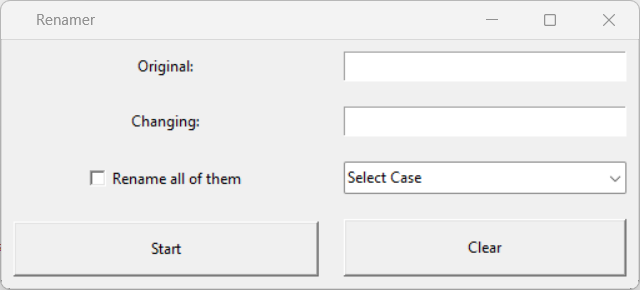

In [1]:
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import ttk
from tkinter import messagebox
import locale

# Türkçe ayarlarını kullanarak yerel yapılandırmayı ayarla
locale.setlocale(locale.LC_ALL, 'tr_TR.UTF-8')

def submit_form():

    selected_value = combobox.get()
    
    if selected_value == "Select Case":
        messagebox.showwarning("Warning", "Please Select Case!")
    
    else:
        # Dosya seçim iletişim kutusunu aç
        files = tk.filedialog.askopenfilenames(title="Select The Files To Rename")
        
        # Seçilen her dosyanın ismini yazdır
        for file in files:
            locale.setlocale(locale.LC_ALL, 'tr_TR.UTF-8')
            entry1_value = entry1.get()
            entry2_value = entry2.get()
            selected_value = combobox.get()
                       
            
            if checkbox_var.get() == 1:
                locale.setlocale(locale.LC_ALL, 'tr_TR.UTF-8')
                # Dosya adını ve uzantısını ayır
                file_dir, file_name = os.path.split(file)
                file_name, file_ext = os.path.splitext(file_name)                
                
                if selected_value == "UPPERCASE":
                    entry2_value = entry2_value.upper()
                elif selected_value == "lowercase":
                    entry2_value = entry2_value.lower()
                elif selected_value == "Sentence case":
                    entry2_value = entry2_value.capitalize()
                elif selected_value == "Title Case":
                    entry2_value = entry2_value.title()
                    
                # Dosya yolunu ve yeni dosya adını birleştir
                new_file_path = os.path.join(file_dir, entry2_value + file_ext)
                
                # Dosyayı yeniden adlandır
                os.rename(file, new_file_path)
                
            else:
                locale.setlocale(locale.LC_ALL, 'tr_TR.UTF-8')
                file_dir, file_name = os.path.split(file)
                file_name, file_ext = os.path.splitext(file_name)
                
                new_file_name = file_name.lower().replace(entry1_value.lower(), entry2_value.lower())
                
                if selected_value == "UPPERCASE":
                    new_file_name = new_file_name.upper()
                elif selected_value == "lowercase":
                    new_file_name = new_file_name.lower()
                elif selected_value == "Sentence case":
                    new_file_name = new_file_name.capitalize()
                elif selected_value == "Title Case":
                    new_file_name = new_file_name.title()
                
                new_file_path = os.path.join(file_dir,new_file_name+file_ext)
                
                # Dosyayı yeniden adlandır
                os.rename(file, new_file_path)
        root.destroy()
            
    print("Files are renamed.")

def checkbox_case():
    if checkbox_var.get() == 1:
        print("Checkbox is checked!")
        entry1.config(state=tk.DISABLED)
    else:
        print("Checkbox is unchecked!")
        entry1.config(state=tk.NORMAL)

def handle_selection(event):
    pass
  
def clear_form():
    # Giriş alanlarını temizle
    entry1.delete(0, tk.END)
    entry2.delete(0, tk.END)
    combobox.set("Select Case")
    
# Ana pencereyi oluştur
root = tk.Tk()
root.title("Renamer")
root.iconbitmap("empty.ico")
root.update_idletasks()
width = root.winfo_width()+310
height = root.winfo_height()
x = (root.winfo_screenwidth() // 2) - (width // 2)
y = (root.winfo_screenheight() // 2) - (height // 2)
root.geometry('{}x{}+{}+{}'.format(width, height, x, y))

frame1 = tk.Frame(root)
frame1.pack(side = tk.LEFT, expand = True, fill = tk.BOTH)

frame2 = tk.Frame(root)
frame2.pack(side = tk.LEFT, expand = True, fill = tk.BOTH)

# İlk etiket
label1 = tk.Label(frame1, text="Original:", width=30)
label1.pack(padx=10, pady=10, expand = True, fill = tk.BOTH)

# İkinci etiket
label2 = tk.Label(frame1, text="Changing:", width=30)
label2.pack(padx=10, pady=10, expand = True, fill = tk.BOTH)

# Create a variable to store the checkbox value
checkbox_var = tk.IntVar()

# Create the checkbox widget
checkbox = tk.Checkbutton(frame1, text="Rename all of them", variable=checkbox_var, command=checkbox_case, width=30)

# Set the checkbox to the unchecked state by default
checkbox.deselect()

# Place the checkbox in the window
checkbox.pack(padx=10, pady=10, expand = True, fill = tk.BOTH)

# İşlemleri gerçekleştiren düğmeyi oluştur
submit_button = tk.Button(frame1, text="Start", command=submit_form, height=2, width=30)
submit_button.pack(padx=10, pady=10, expand = True, fill = tk.BOTH)



# İlk giriş alanı
entry1 = tk.Entry(frame2, width=30)
entry1.pack(padx=10, pady=10, expand = True, fill = tk.BOTH)

# İkinci giriş alanı
entry2 = tk.Entry(frame2, width=30)
entry2.pack(padx=10, pady=10, expand = True, fill = tk.BOTH)

# Create a list of items for the Combobox
items = ["UPPERCASE", "lowercase", "Sentence case", "Title Case"]

# Create a Combobox widget
combobox = ttk.Combobox(frame2, values=items, width=30)

# Set an initial selection
combobox.set("Select Case")

# Bind the selection event
combobox.bind("<<ComboboxSelected>>", handle_selection)

# Place the Combobox in the window
combobox.pack(padx=10, pady=10, expand = True, fill = tk.BOTH)

#Giriş alanlarını temizleyen düğmeyi oluştur
clear_button = tk.Button(frame2, text="Clear", command=clear_form, height=2, width=30)
clear_button.pack(padx=10, pady=10, expand = True, fill = tk.BOTH)

# Pencereyi başlat
root.mainloop()